# Risk Factor Analysis for Heart Disease

## Imports and Data Cleaning

In [74]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline

In [75]:
# Import our data into pandas from CSV

heart_disease_df = pd.read_csv('Resources\heart_2020_cleaned.csv')


# Drop unwanted columns

heart_disease_df = heart_disease_df.drop(columns=['Stroke','PhysicalHealth','MentalHealth','DiffWalking',
                                                  'Race','Diabetic','GenHealth','Asthma','KidneyDisease',
                                                  'SkinCancer'])


# Rename remaining columns for clarity

renamed_df = heart_disease_df.rename(columns={'HeartDisease':'Heart Disease', 'AlcoholDrinking':'Alcohol Drinking', 
                                              'AgeCategory':'Age Category', 'PhysicalActivity':'Physical Activity', 
                                              'SleepTime':'Sleep Time'})

In [76]:
# View first 5 lines of data

renamed_df.head()

,Heart Disease,BMI,Smoking,Alcohol Drinking,Sex,Age Category,Physical Activity,Sleep Time
0,No,16.60,Yes,No,Female,55-59,Yes,5.0
1,No,20.34,No,No,Female,80 or older,Yes,7.0
2,No,26.58,Yes,No,Male,65-69,Yes,8.0
3,No,24.21,No,No,Female,75-79,No,6.0
4,No,23.71,No,No,Female,40-44,Yes,8.0


## Age and Alcohol Use

In [77]:
# Find the maximum and minimum age

print(renamed_df["Age Category"].max())
print(renamed_df["Age Category"].min())

80 or older
18-24


In [78]:
# Slice the data, place it in bins, and create a new column to contain the data series

df_ages = pd.DataFrame({'Age Category': []})
df_ages['age_by_decade']= pd.cut(x=df_ages['Age Category'], bins=[18,24,29,34,39,44,49,54,59,64,69,74,79,80])

renamed_df.head()


# Count how many values are in each Age category

Age_group = renamed_df.groupby('Age Category')['Age Category'].count()
Age_group

Age Category
18-24          21064
25-29          16955
30-34          18753
35-39          20550
40-44          21006
45-49          21791
50-54          25382
55-59          29757
60-64          33686
65-69          34151
70-74          31065
75-79          21482
80 or older    24153
Name: Age Category, dtype: int64

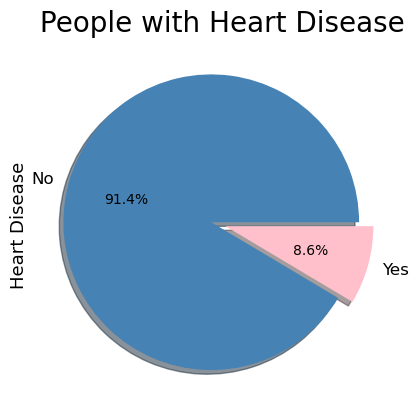

In [79]:
#Creating a pie chart to determine the percentage of people with heart disease.

heart_data= renamed_df["Heart Disease"].value_counts()
plt.title(" People with Heart Disease")


#Defining colors for the pie chart

colors = ['steelblue','pink']


#Defining the ratio of gap between each segment

explode=(0.05,0.05)

heart_data.plot.pie(autopct= "%1.1f%%", colors=colors,explode= explode, shadow = True)
plt.savefig('Visualization/heart_data.png')
plt.show()

In [80]:
#Number of people consuming alcohol

alcohol_group=renamed_df.groupby('Alcohol Drinking')['Alcohol Drinking'].count()
alcohol_group

Alcohol Drinking
No     298018
Yes     21777
Name: Alcohol Drinking, dtype: int64

In [81]:
#Creating a dataframe with just the heart disease and alcohol column

heart_alcohol_df = renamed_df[['Heart Disease','Alcohol Drinking']]
heart_alcohol_df


#Finding the number of people with heart disease and yes for alcohol consumption

heart_alcohol_df[(heart_alcohol_df['Heart Disease'] == 'Yes') & (heart_alcohol_df['Alcohol Drinking'] == 'Yes')].value_counts()

Heart Disease  Alcohol Drinking
Yes            Yes                 1141
dtype: int64

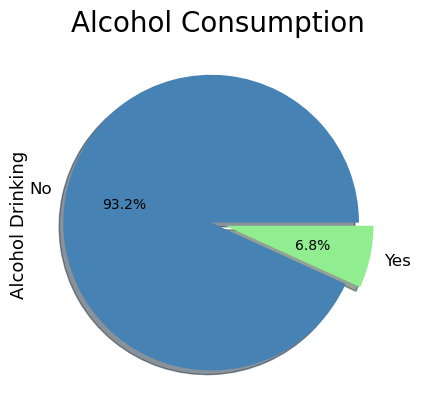

In [82]:
#Creating a pie chart for alcohol drinking.

alcohol_data= renamed_df["Alcohol Drinking"].value_counts()
plt.title("Alcohol Consumption")


#Defining colors for the pie chart

colors = ['steelblue','lightgreen']


#Defining the ratioof gap between each segment

explode=(0.05,0.05)

alcohol_data.plot.pie(autopct= "%1.1f%%", colors=colors,explode= explode, shadow = True)
plt.savefig('Visualization/alcohol_data.png')
plt.show()

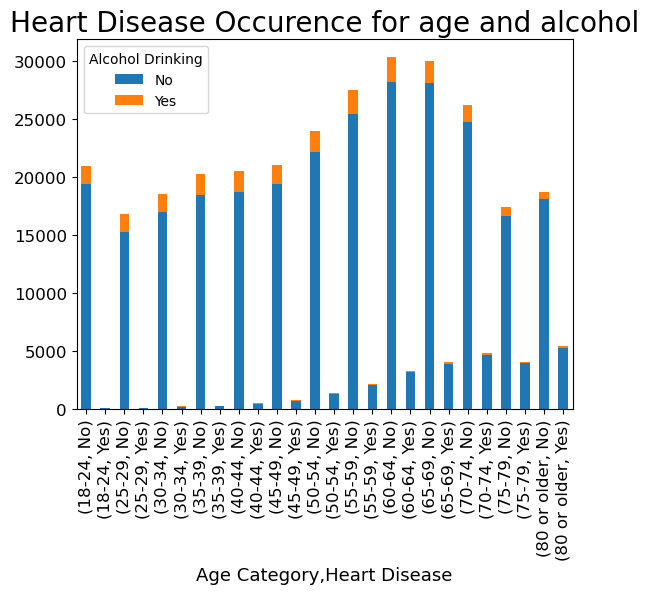

In [83]:
#creating a stacked bar graph to visualize number of people with heart disease in different age categories and also number of people drinking alcohol.

age_groups_disease = renamed_df.groupby(['Age Category', 'Heart Disease','Alcohol Drinking']).size().unstack()
age_groups_disease.plot(kind = 'bar', stacked =True)


#Give the chart a title and saving the graph as png

plt.title('Heart Disease Occurence for age and alcohol')
plt.savefig('Visualization/age_groups_disease.png')
plt.show()

## BMI

In an analysis of heart disease in relation to BMI, there is a demonstrated correlation between the two. In the visualizations below, it is clearly seen that the further away one gets from a healthy BMI (defined as 18.5-24.9 by the CDC), the more likely one is to have heart disease. Those who are underweight (less than 18.5 BMI) have an increased risk of heart disease, but less so than those whose BMI is greater than the healthy range. The number of people with heart disease steadily increases as BMI increases, and conversely, the number of people without heart disease increases as the number approaches the healthy BMI range.

In [84]:
# Find the maximum and minimum BMI scores to determine bin edges

print(renamed_df["BMI"].max())
print(renamed_df["BMI"].min())

94.85
12.02


In [85]:
# Create bins in which to place values based upon BMI value

bmi_bins=[0, 18.49, 24.99, 29.99, 34.99, 39.99, 95]

In [86]:
# Create bin labels based on on CDC's BMI definitions

bmi_labels=['Underweight (less than 18.5)','Healthy Weight (18.5 to 24.9)','Overweight (25 to 29.9)',
            'Class 1 Obese (30 to 34.99)','Class 2 Obese (35 to 39.99)','Class 3 Severely Obese (40+)']

In [87]:
# Slice the data, place it in bins, and create a new column to contain the data series

renamed_df['BMI Category'] = pd.cut(renamed_df["BMI"], bmi_bins, labels=bmi_labels)
renamed_df.head()

,Heart Disease,BMI,Smoking,Alcohol Drinking,Sex,Age Category,Physical Activity,Sleep Time,BMI Category
0,No,16.60,Yes,No,Female,55-59,Yes,5.0,Underweight (less than 18.5)
1,No,20.34,No,No,Female,80 or older,Yes,7.0,Healthy Weight (18.5 to 24.9)
2,No,26.58,Yes,No,Male,65-69,Yes,8.0,Overweight (25 to 29.9)
3,No,24.21,No,No,Female,75-79,No,6.0,Healthy Weight (18.5 to 24.9)
4,No,23.71,No,No,Female,40-44,Yes,8.0,Healthy Weight (18.5 to 24.9)


In [88]:
# Count how many values are in each BMI category for Overview of data

bmi_group = renamed_df.groupby('BMI Category')['BMI Category'].count()
bmi_group

BMI Category
Underweight (less than 18.5)       5110
Healthy Weight (18.5 to 24.9)     97331
Overweight (25 to 29.9)          114512
Class 1 Obese (30 to 34.99)       61345
Class 2 Obese (35 to 39.99)       25112
Class 3 Severely Obese (40+)      16385
Name: BMI Category, dtype: int64

In [89]:
# Reduce dataframe to columns that will be manipulated

bmi_df = renamed_df[['Heart Disease','BMI Category']]
bmi_df.head()

,Heart Disease,BMI Category
0,No,Underweight (less than 18.5)
1,No,Healthy Weight (18.5 to 24.9)
2,No,Overweight (25 to 29.9)
3,No,Healthy Weight (18.5 to 24.9)
4,No,Healthy Weight (18.5 to 24.9)


In [90]:
# Group the DataFrame by 'BMI Category' and 'Heart Disease' and separate by yes/no value in Heart Disease column

bmi_grouped_df = bmi_df.groupby(['BMI Category', 'Heart Disease']).size().unstack()
bmi_grouped_df.head()

Heart Disease,No,Yes
BMI Category,,
Underweight (less than 18.5),4709,401
Healthy Weight (18.5 to 24.9),91022,6309
Overweight (25 to 29.9),104521,9991
Class 1 Obese (30 to 34.99),55185,6160
Class 2 Obese (35 to 39.99),22412,2700


In [91]:
# Calculate the percentage for each row
# axis=1 means sum across columns
# axis=0 means the division should be performed across the rows

percentages = bmi_grouped_df.div(bmi_grouped_df.sum(axis=1), axis=0) * 100

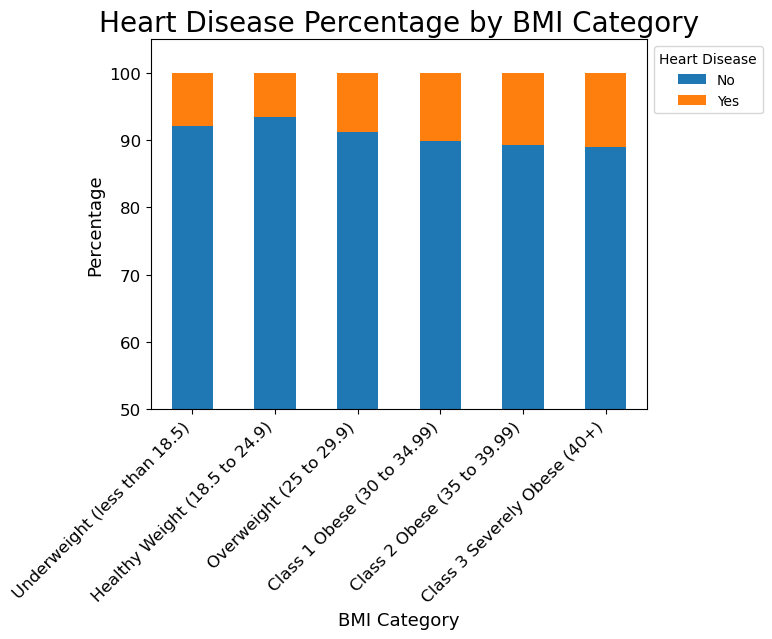

In [92]:
# Prepare a stacked bar chart

# Plot the stacked bar chart using percentages

fig1 = percentages.plot(kind='bar', stacked=True)


# Customize the plot

plt.xlabel('BMI Category')
plt.ylabel('Percentage')
plt.title('Heart Disease Percentage by BMI Category')
plt.legend(title='Heart Disease', loc='upper right')


# Rotate x-axis labels by 45 degrees

plt.xticks(rotation=45, ha='right')


# Set the y-axis limits from 50% to 100% to increase readability

plt.ylim(50)


# Move the legend outside the top right of the chart

plt.legend(title='Heart Disease', bbox_to_anchor=(1, 1), loc='upper left')


# Save the chart

plt.savefig('Visualization/BMI Category Heart Disease Stacked Bar Chart.png', bbox_inches='tight')


# Display the plot

plt.show()

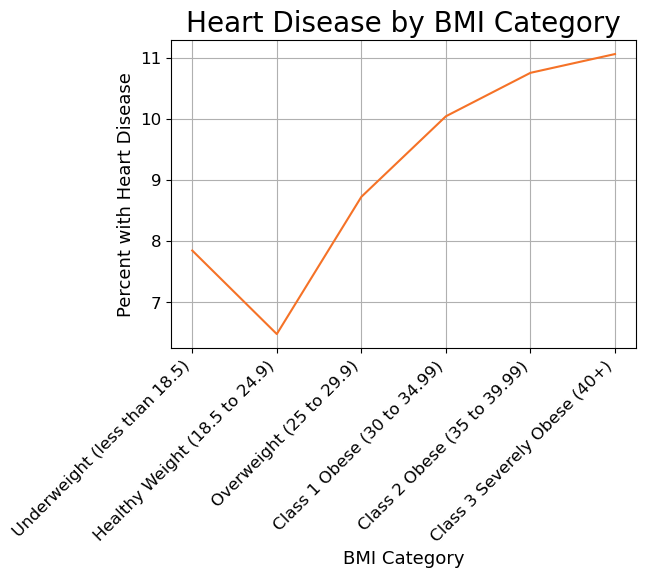

In [93]:
# Prepare the line chart for patients with heart disease

percentages['Yes'].plot(kind="line",figsize=(6,4), color='#f57227',
                             title = "Heart Disease by BMI Category",
                             xlabel = "BMI Category",
                             ylabel = "Percent with Heart Disease")

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Add background grid
plt.grid(True)

# Save the figure as a PNG file
plt.savefig('Visualization/BMI Category Percent WITH Heart Disease.png', bbox_inches='tight')

plt.show()

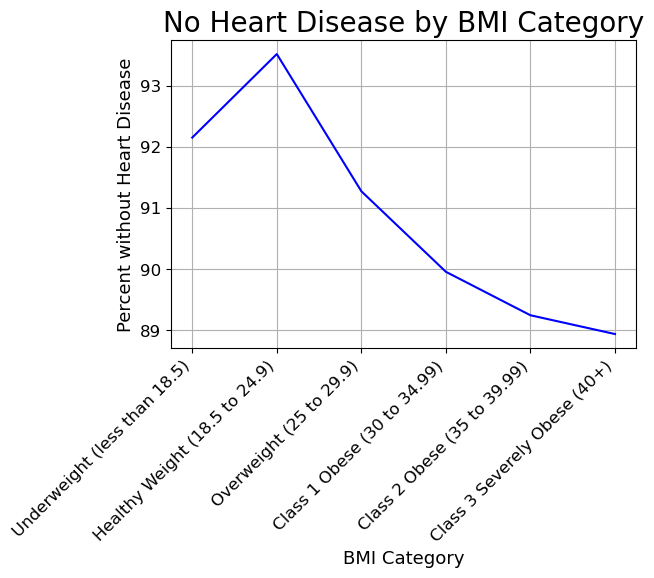

In [94]:
# Prepare the line chart for patients without heart disease

percentages['No'].plot(kind="line",figsize=(6,4), color='blue',
                             title = "No Heart Disease by BMI Category",
                             xlabel = "BMI Category",
                             ylabel = "Percent without Heart Disease")

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Add background grid
plt.grid(True)

# Save the figure as a PNG file
plt.savefig('Visualization/BMI Category Percent without Heart Disease.png', bbox_inches='tight')

plt.show()

In [95]:
# Round and format the percentages

percentages['Yes'] = percentages['Yes'].round(2).astype(str) + '%'
percentages['No'] = percentages['No'].round(2).astype(str) + '%'
percentages

Heart Disease,No,Yes
BMI Category,,
Underweight (less than 18.5),92.15%,7.85%
Healthy Weight (18.5 to 24.9),93.52%,6.48%
Overweight (25 to 29.9),91.28%,8.72%
Class 1 Obese (30 to 34.99),89.96%,10.04%
Class 2 Obese (35 to 39.99),89.25%,10.75%
Class 3 Severely Obese (40+),88.94%,11.06%


## Sex and Smoking

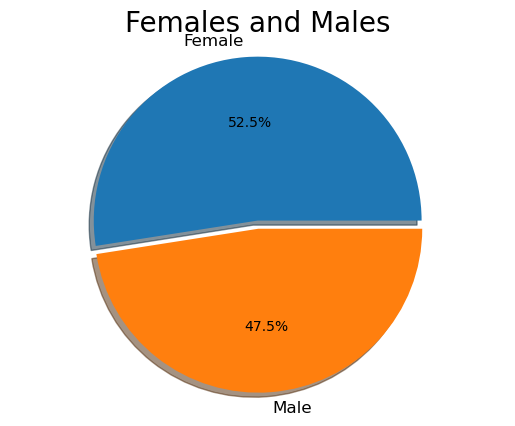

In [96]:
# Percentage of Males and Females in the Study

labels = renamed_df['Sex'].unique()
explode = (0.05,0)
plt.pie(renamed_df['Sex'].value_counts(), labels = labels,autopct="%1.1f%%",explode = explode, shadow=True)
plt.title('Females and Males')
plt.axis('equal')
plt.savefig('Visualization/gender_data.png')
plt.show()

In [97]:
#Number of Females and Males with and without Heart disease

gender = renamed_df.groupby(['Sex', 'Heart Disease']).size()
gender

Sex     Heart Disease
Female  No               156571
        Yes               11234
Male    No               135851
        Yes               16139
dtype: int64

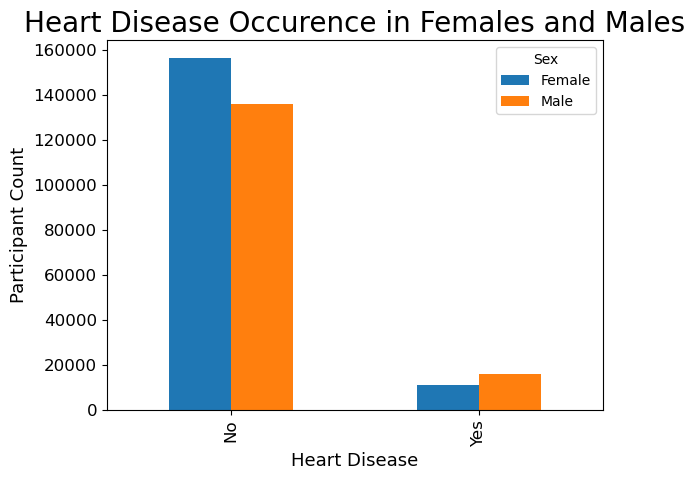

In [98]:
# Creating a bar chart for Heart Disease Occurence in Males and Females

heart_disease_sex = renamed_df.groupby(['Heart Disease', 'Sex']).size().unstack()
heart_disease_sex.plot(kind = 'bar', stacked =False)
plt.ylabel('Participant Count')
plt.title('Heart Disease Occurence in Females and Males')
plt.savefig('Visualization/Heart Disease Occurence in Females and Males')
plt.show()

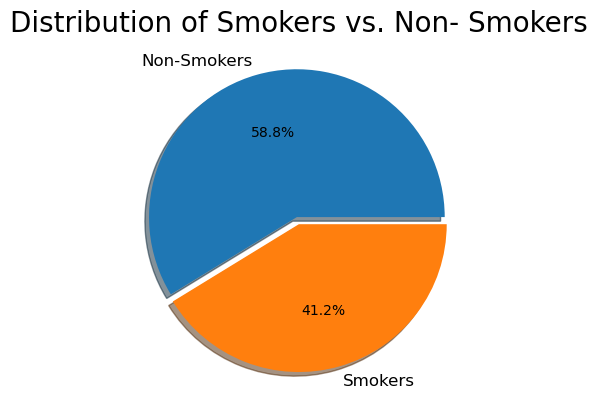

In [99]:
#Creating the Pie chart for Smokers and non-smokers in the survey

labels = ['Non-Smokers','Smokers']
explode = (0.05,0)
plt.axis("equal")
plt.pie(renamed_df['Smoking'].value_counts(), labels = labels,autopct="%1.1f%%", explode= explode, shadow=True)
plt.title ('Distribution of Smokers vs. Non- Smokers')
plt.show()

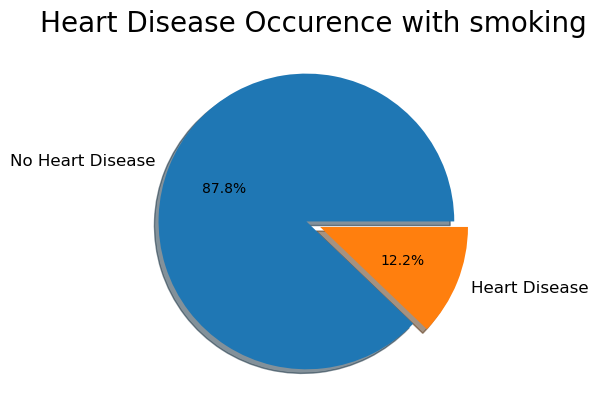

In [100]:
# Creating a Pie chart to show individuals that smoke and heart disease

smoking_and_heart_disease = renamed_df[(renamed_df['Smoking'] == 'Yes')]
labels = ['No Heart Disease', 'Heart Disease']
explode = (0.05,0.05)
plt.axis("equal")
plt.pie(smoking_and_heart_disease['Heart Disease'].value_counts(),autopct="%1.1f%%", shadow=True, labels= labels, explode = explode)
plt.title ('Heart Disease Occurence with smoking')
plt.savefig('Visualization/Heart_Disease_Occurence_with_smoking')
plt.show()

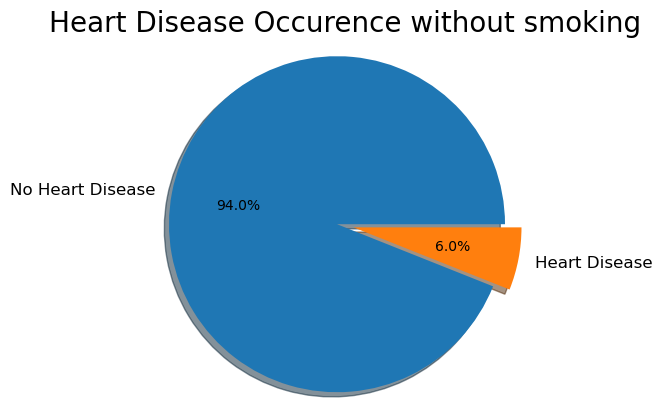

In [101]:
# Creating a Pie chart to show individuals that do not smoke and heart disease occurence 

no_smoking_and_heart_disease = renamed_df[(renamed_df['Smoking']== 'No')]
labels = ['No Heart Disease', 'Heart Disease']
explode = (0.05,0.05)
plt.pie(no_smoking_and_heart_disease['Heart Disease'].value_counts(),autopct="%1.1f%%", shadow=True, labels= labels, explode = explode )
plt.title ('Heart Disease Occurence without smoking')
plt.axis("equal")
plt.savefig('Visualization/Heart_Disease_Occurence_without_smoking')
plt.show()

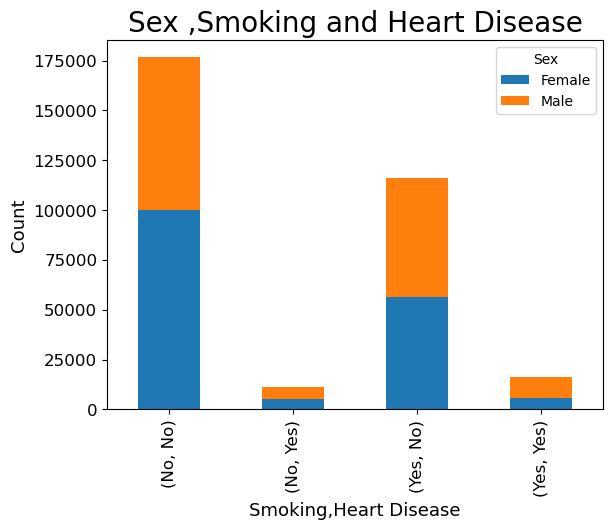

In [102]:
#Creating a stacked bar graph to visualize Males, females , smoking status and heart disease occurence 

smoking_sex_count = renamed_df.groupby(['Smoking', 'Heart Disease','Sex']).size().unstack()
smoking_sex_count.plot(kind = 'bar', stacked = True)
plt.title('Sex ,Smoking and Heart Disease')
plt.ylabel('Count')
plt.savefig('Visualization/sex_smoking_heart_disease')
plt.show()

## Sleep Time & Physical Activity Analysis

By using the binning method we will determine the sleep times in groups. From here we will determine the five sleep categories from this dataset. We will focus on the 2 extremes of the sleep categories, which are Hyposomnia and Hypersomnia. Hyposonmia is when the individual gets less than 4 hours of sleep. Meanwhile, individuals who get more than 12 hours of sleep, suffer from Hypersonmia. 

Five variables were created using the dataframe: "total_sleep", "physical_group", "heart_group", "sleep_heart_percent" and "heart_physical". These variables are used to determine the visualizations, that were used for analyzing sleep time and physical activity. We also thought of combining the sleep categories with physical activity too. This way, we wanted to see if there was a certain sleep category that was linked to Heart Disease.

The pie chart shows the individuals based off the five categories. Almost two thirds of the data show that individuals are getting the proper amount of sleep. In terms of the two extremes, only 3.5% are getting very limited sleep (less than 4 hours), will 0.3% are sleeping at a very high unhealthy amount of over 12 hours.


For Physical Activity we compared it to both the Sleep Categories, as well as Heart Disease. We wanted to see if we the certain sleep categories have an impact on heart disease. From the analysis, it shows that Hypersomnia has the greatest impact in terms of physical activity and sleep categories. For heart disease it shows that only 9884 individuals have heart disease and do not get any physical activity. This is calculated to a 3.1% of the entire dataset. It shows that physical activity has a marginal impact on heart disease. 

In [103]:
# Displaying the summary statistics for Sleep Time 

renamed_df["Sleep Time"].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: Sleep Time, dtype: float64

In [104]:
# Create the bins and labels to create the Sleep Categories 

sleep_bins = [0, 4, 6, 9, 12, 24]
sleep_labels = ["Hyposomnia <4", "Less than Ideal 4-6", "Ideal/Recommended 7-9", "Above Average 10-12", "Hypersomnia >12"]

In [105]:
# Create a new columnm called "Sleep Category" that will indicate the type of sleep each person is getting.

renamed_df["Sleep Category"] = pd.cut(renamed_df["Sleep Time"], bins=sleep_bins, labels=sleep_labels)

renamed_df.head(15)

,Heart Disease,BMI,Smoking,Alcohol Drinking,Sex,Age Category,Physical Activity,Sleep Time,BMI Category,Sleep Category
0,No,16.60,Yes,No,Female,55-59,Yes,5.0,Underweight (less than 18.5),Less than Ideal 4-6
1,No,20.34,No,No,Female,80 or older,Yes,7.0,Healthy Weight (18.5 to 24.9),Ideal/Recommended 7-9
2,No,26.58,Yes,No,Male,65-69,Yes,8.0,Overweight (25 to 29.9),Ideal/Recommended 7-9
3,No,24.21,No,No,Female,75-79,No,6.0,Healthy Weight (18.5 to 24.9),Less than Ideal 4-6
4,No,23.71,No,No,Female,40-44,Yes,8.0,Healthy Weight (18.5 to 24.9),Ideal/Recommended 7-9
5,Yes,28.87,Yes,No,Female,75-79,No,12.0,Overweight (25 to 29.9),Above Average 10-12
6,No,21.63,No,No,Female,70-74,Yes,4.0,Healthy Weight (18.5 to 24.9),Hyposomnia <4
7,No,31.64,Yes,No,Female,80 or older,No,9.0,Class 1 Obese (30 to 34.99),Ideal/Recommended 7-9
8,No,26.45,No,No,Female,80 or older,No,5.0,Overweight (25 to 29.9),Less than Ideal 4-6
9,No,40.69,No,No,Male,65-69,Yes,10.0,Class 3 Severely Obese (40+),Above Average 10-12


In [106]:
# Creating a dataframe just for the 5 Sleep Categories

total_sleep = renamed_df.groupby("Sleep Category")["Sleep Category"].count()

total_sleep

Sleep Category
Hyposomnia <4             11081
Less than Ideal 4-6       85905
Ideal/Recommended 7-9    211394
Above Average 10-12       10416
Hypersomnia >12             999
Name: Sleep Category, dtype: int64

In [107]:
# Breaking down the number of per Sleep Category, while taking into account if the individual is also physically active.

physical_group = renamed_df.groupby(["Sleep Category", "Physical Activity"]).size().unstack()

physical_group

Physical Activity,No,Yes
Sleep Category,,
Hyposomnia <4,4221,6860
Less than Ideal 4-6,22208,63697
Ideal/Recommended 7-9,40592,170802
Above Average 10-12,4313,6103
Hypersomnia >12,504,495


In [108]:
# Breakdown the individuals who do and do not have heart disease as per the five sleep categories.

heart_group = pd.DataFrame(renamed_df.groupby(["Sleep Category", "Heart Disease"]).size().unstack())

heart_group

Heart Disease,No,Yes
Sleep Category,,
Hyposomnia <4,9366,1715
Less than Ideal 4-6,78448,7457
Ideal/Recommended 7-9,195015,16379
Above Average 10-12,8762,1654
Hypersomnia >12,831,168


In [109]:
# Heart Disease percentage based off the five sleep categories

sleep_heart_percent = heart_group.div(heart_group.sum(axis=1), axis=0) * 100

sleep_heart_percent

Heart Disease,No,Yes
Sleep Category,,
Hyposomnia <4,84.523057,15.476943
Less than Ideal 4-6,91.319481,8.680519
Ideal/Recommended 7-9,92.251909,7.748091
Above Average 10-12,84.120584,15.879416
Hypersomnia >12,83.183183,16.816817


In [110]:
# The number of people who have heart disease vs. Physical Activity

heart_physical = renamed_df.groupby(["Heart Disease", "Physical Activity"]).size().unstack()

heart_physical

Physical Activity,No,Yes
Heart Disease,,
No,61954,230468
Yes,9884,17489


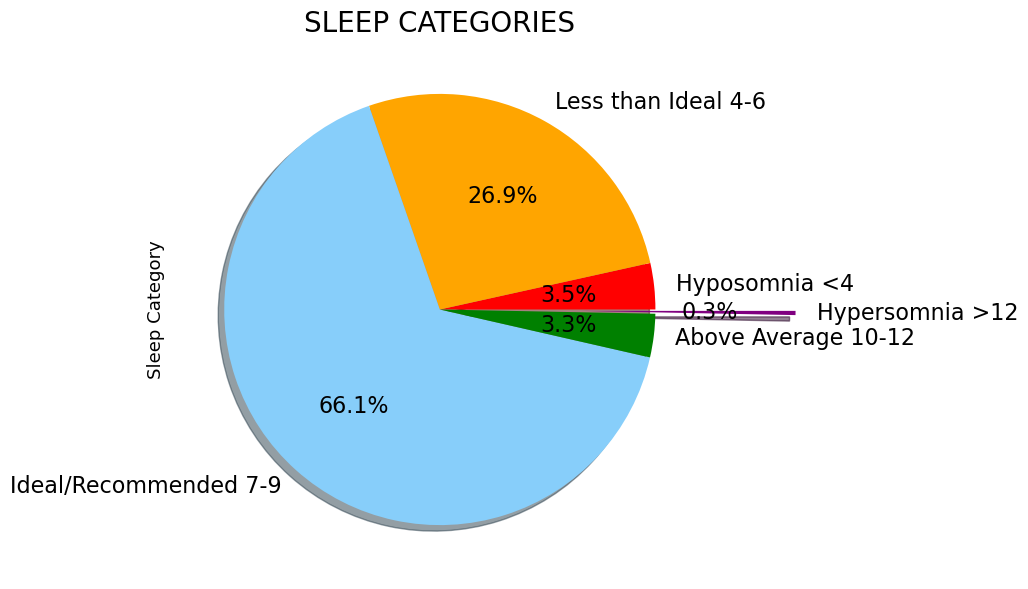

In [111]:
# Pie Chart Visualization 

# Plotting the title called "Sleep Categories"
plt.title("SLEEP CATEGORIES")

colors = ["red", "orange", "lightskyblue", "green", "purple"]


explode = [0, 0, 0, 0, 0.65]

plot = total_sleep.plot.pie(figsize=(7,7), explode=explode, colors=colors,
                            autopct="%1.1f%%", textprops={"fontsize": 16}, shadow=True)  
                                                               
       
# Inputting title "size"        
        
partitle = {"titlesize":24}

    
# Save Visualization as PNG file 

plt.savefig("Visualization/Sleep_Categories_Pie_chart.png", bbox_inches="tight")

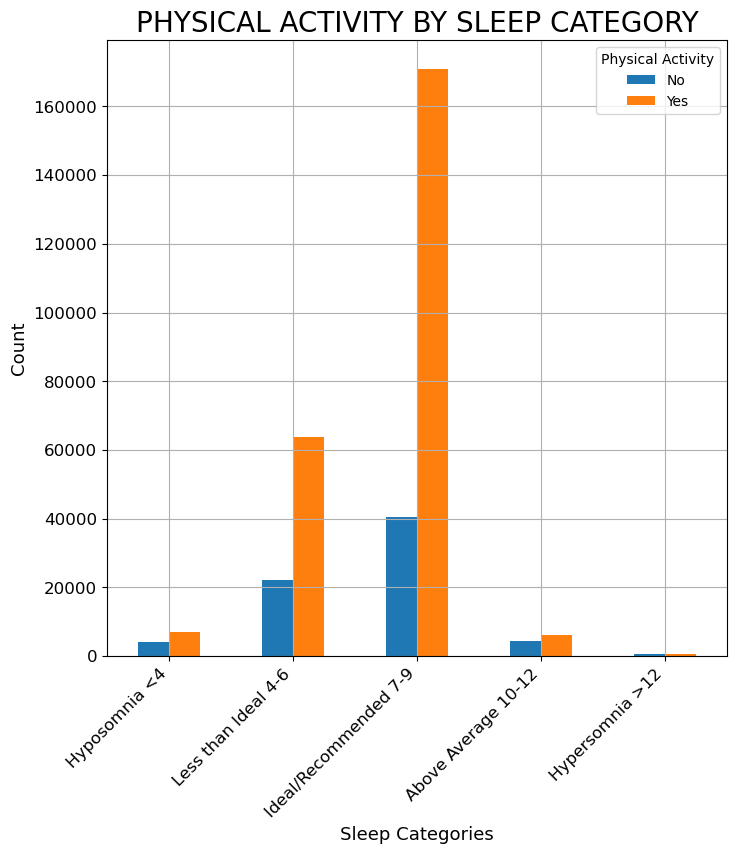

In [112]:
# Double Bar Graph for Physical Activity, while incorporating the five sleep groups. 

SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

physical_group.plot(kind = "bar", figsize=(8,8), grid=True, 
                 title = "PHYSICAL ACTIVITY BY SLEEP CATEGORY",
                 xlabel = "Sleep Categories", 
                 ylabel = "Count")


par = {"axes.titlesize":20}
plt.rcParams.update(par)
plt.rc("axes", labelsize=MEDIUM_SIZE)


# Rotate x-axis    
plt.xticks(rotation=45, ha="right")   
plt.rc("xtick", labelsize = MEDIUM_SIZE)


# Save Visualization as PNG file 

plt.savefig("Visualization/PhysicalActivity_vs_Sleep_DoubleBar_chart.png", bbox_inches="tight")


plt.show()

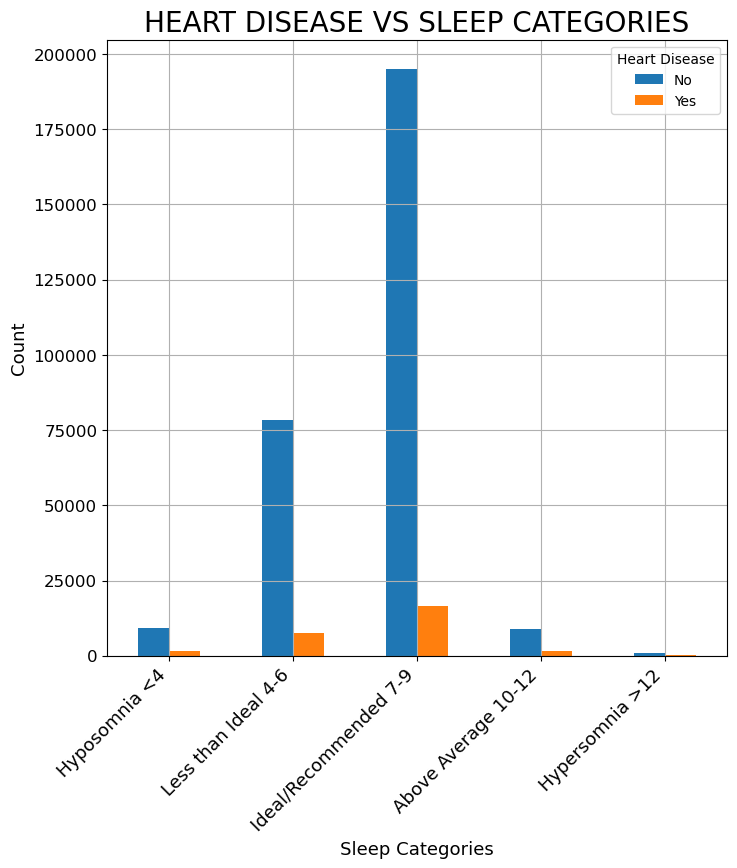

In [113]:
# Double Bar Graph Visualization for individuals with Heart Disease. 

# Calculate the percentage of each row in the Heart Disease vs. Sleep Category dataframe

SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

heart_group.plot(kind ="bar", figsize=(8,8), grid=True,
                title = "HEART DISEASE VS SLEEP CATEGORIES",
                xlabel = "Sleep Categories",
                ylabel = "Count",
                stacked=False)
           

# Rotate x-axis
plt.xticks(rotation=45, ha="right")


# Save visualization as PNG file

plt.savefig("Visualization/HeartDisease_vs_Sleep_Double_bar_chart.png", bbox_inches="tight")


plt.show()

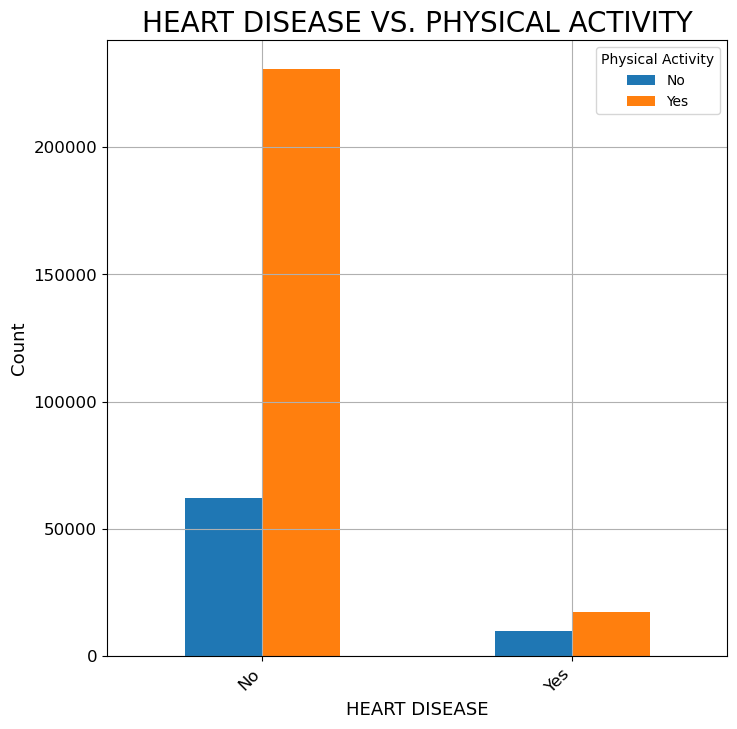

In [115]:
# Double Bar Graph Visualization for Heart Disease vs. Physical Activity. 

# Calculate the percentage of each row in the Heart Disease vs. Sleep Category dataframe

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

heart_physical.plot(kind ="bar", figsize=(8,8), grid=True, 
                title = "HEART DISEASE VS. PHYSICAL ACTIVITY",
                xlabel = "HEART DISEASE",
                ylabel = "Count",
                stacked=False)
           
                               
# Rotate x-axis, plotting x axes and y axes 
plt.xticks(rotation=45, ha="right")
plt.rc("xtick", labelsize = MEDIUM_SIZE)
plt.rc("ytick", labelsize = MEDIUM_SIZE)

# Save visualization as PNG file

plt.savefig("Visualization/HeartDisease_vs_PhyiscalActivity_Double_bar_chart.png", bbox_inches="tight")


plt.show()

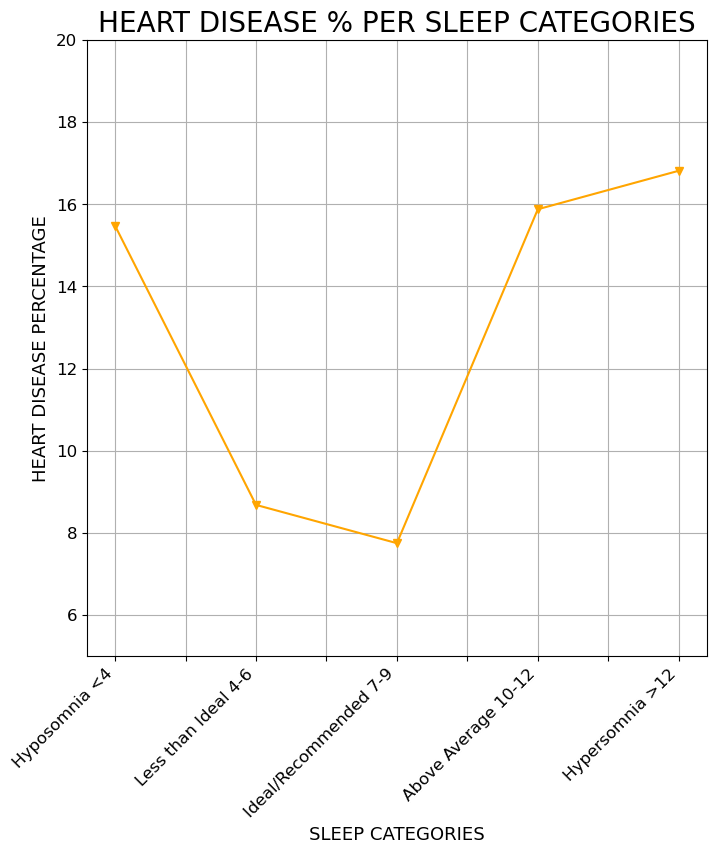

In [116]:
# Line Graph Visualization for Heart Disease Percentage vs. 5 Sleep Categories

sleep_heart_percent["Yes"].plot(kind ="line", figsize=(8,8), grid=True, marker="v", color="orange",
                title = "HEART DISEASE % PER SLEEP CATEGORIES",
                xlabel = "SLEEP CATEGORIES",
                ylabel = "HEART DISEASE PERCENTAGE") 

# Set limits for the y-axis

plt.ylim(5,20) 

                              
# Rotate x-axis, set x ticks, x axes and y axes size
plt.xticks(rotation=45, ha="right")


# Save visualization as PNG file

plt.savefig("Visualization/HeartDisease_Percentage_vs_Sleep_line_chart.png", bbox_inches="tight")


plt.show()